
                                            T.C. Sakarya Üniversitesi Bilgisayar ve Bilişim Sistemleri Fakültesi
                                                            Bilgisayar Mühendsiliği Bölümü

                                                            Büyük Veriye Giriş Dersi Proje Ödevi
                                                    Ödev Konusu: Titanic - Machine Learning from Disaster

                                                            Deniz Berfin Taştan / B181210010 / 1-B
                                                        Mustafa Melih Tüfekcioğlu / B191210004 / 1-A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore" , category=DeprecationWarning)
warnings.filterwarnings("ignore" , category=FutureWarning)

In [2]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.duplicated().sum()

0

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


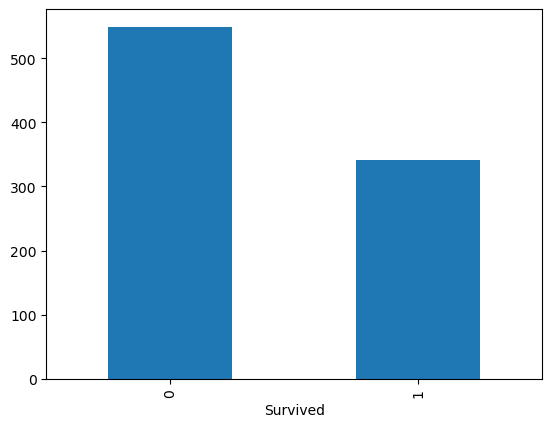

In [5]:
train['Survived'].value_counts().plot(kind='bar').set(xlabel="Survived")
plt.show()

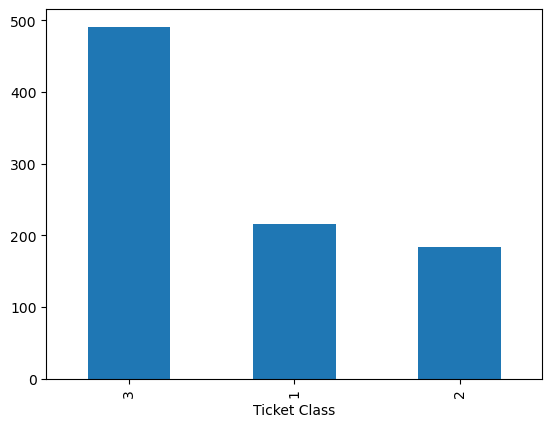

In [6]:
train['Pclass'].value_counts().plot(kind='bar').set(xlabel="Ticket Class")
plt.show()

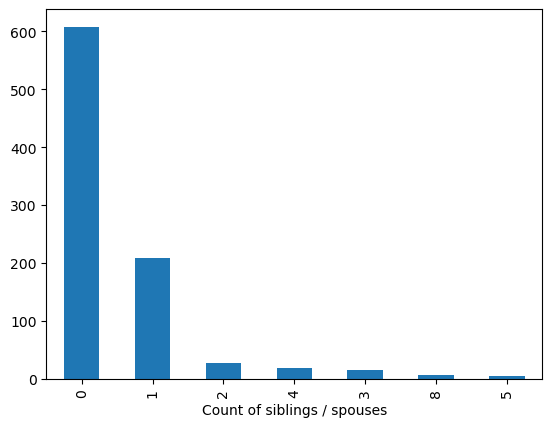

In [7]:
train['SibSp'].value_counts().plot(kind='bar').set(xlabel="Count of siblings / spouses")
plt.show()

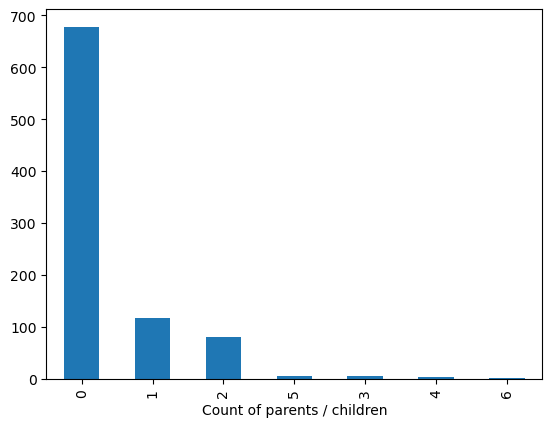

In [8]:
train['Parch'].value_counts().plot(kind='bar').set(xlabel="Count of parents / children")
plt.show()

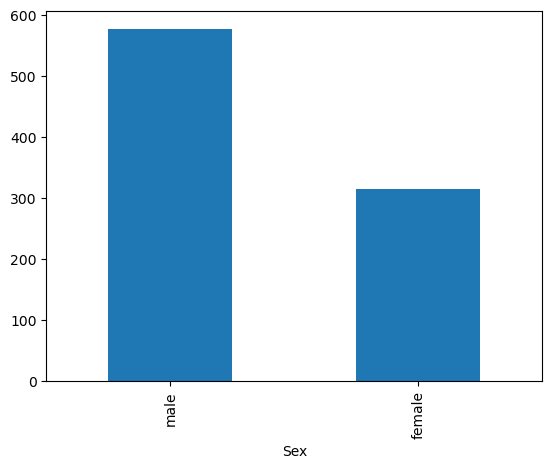

In [9]:
train['Sex'].value_counts().plot(kind='bar').set(xlabel='Sex')
plt.show()

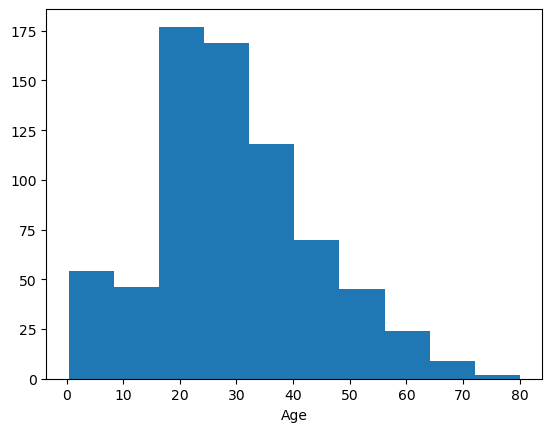

In [10]:
plt.hist(train['Age'])
plt.xlabel('Age')
plt.show()

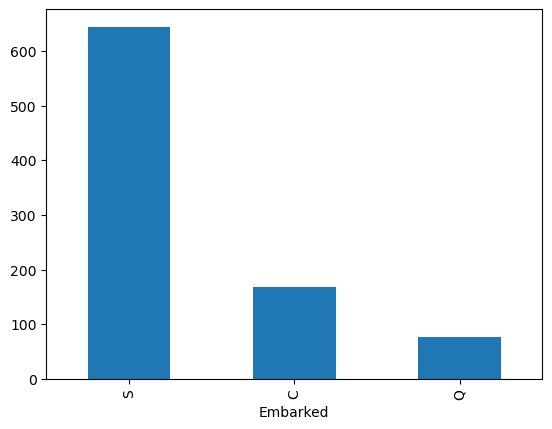

In [11]:
train['Embarked'].value_counts().plot(kind='bar').set(xlabel="Embarked")
plt.show()

<AxesSubplot:>

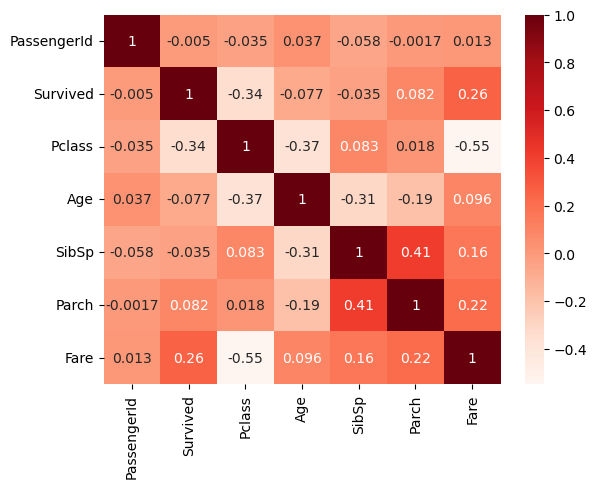

In [12]:
train.corr()
sns.heatmap(train.corr(),cmap="Reds", annot=True)

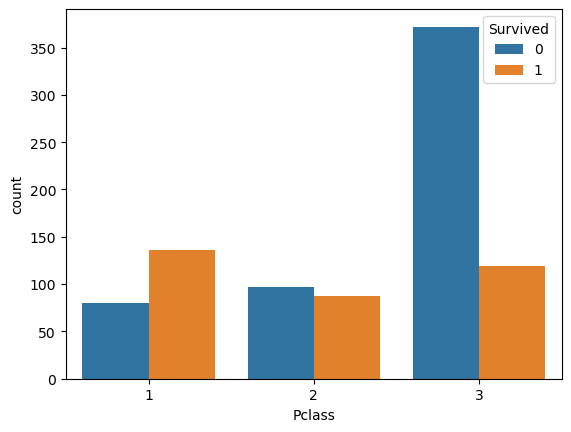

In [13]:
sns.countplot(x=train['Pclass'],hue=train['Survived'],data=train)
plt.show()

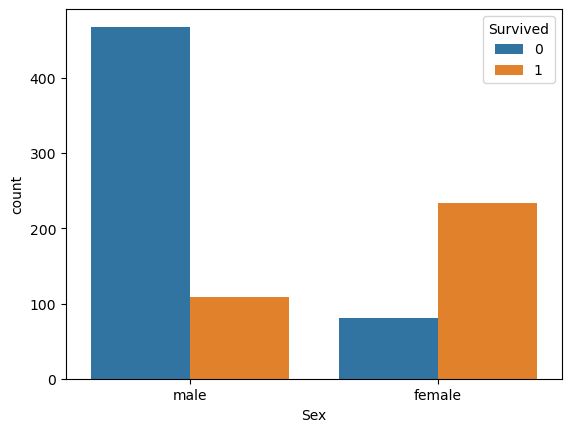

In [14]:
sns.countplot(x=train['Sex'],hue=train['Survived'],data=train)
plt.show()

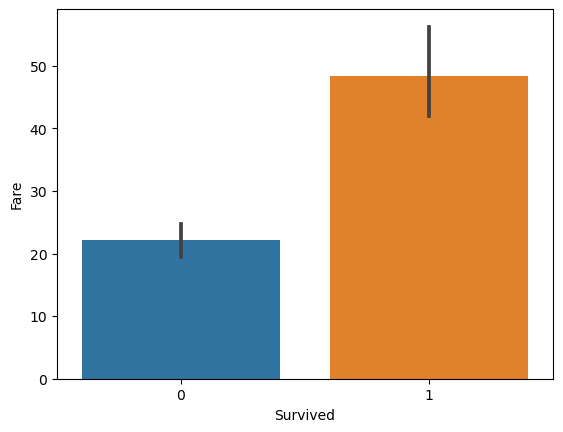

In [15]:
sns.barplot(x=train['Survived'],y=train['Fare'])
plt.show()

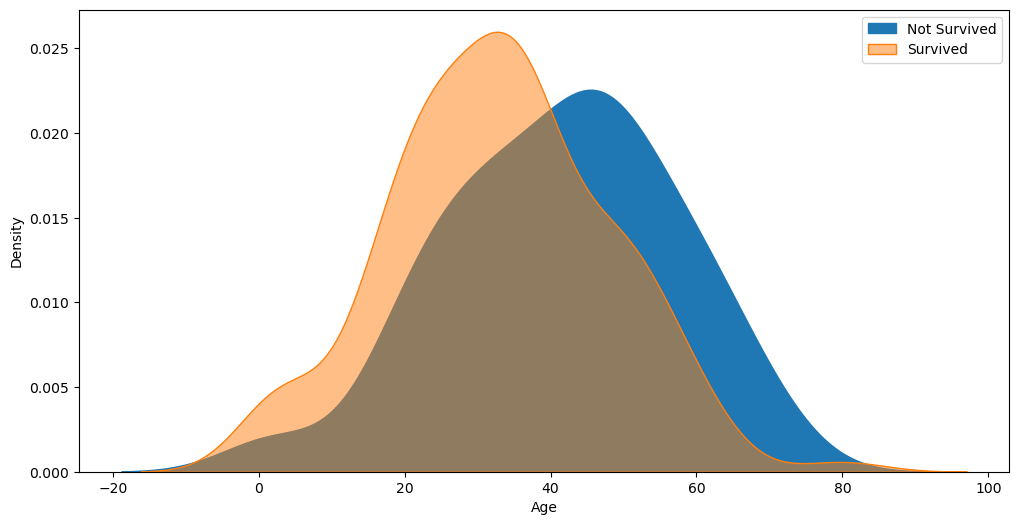

In [16]:
plt.figure(figsize=(12,6))
sns.kdeplot(x="Age",data=train[train['Survived']==0].dropna(),fill=True,alpha=1,label="Not Survived")
sns.kdeplot(x="Age",data=train[train['Survived']==1].dropna(),fill=True,alpha=0.5,label="Survived")
plt.legend()
plt.show()

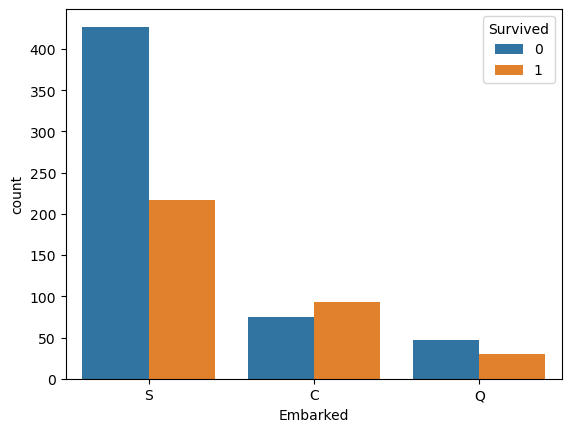

In [17]:
sns.countplot(x=train['Embarked'],hue=train['Survived'],data=train)
plt.show()

In [18]:
train.isnull().sum() 
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Embarked'].fillna('S',inplace=True) 
train.drop(columns=['Cabin'],inplace=True)

test.isnull().sum()
test.drop(columns=['Cabin'],inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [19]:
train.drop(columns=['Name','Ticket'],inplace=True)
test.drop(columns=['Name','Ticket'],inplace=True)
train['temp_Family']=train['SibSp'] + train['Parch']
test['temp_Family']=test['SibSp'] + test['Parch']
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [20]:
ages= [0,16,30,45,50]
labels = ['Children','Young','Adult','Old']
train['AgeGroup'] = pd.cut(train['Age'], bins=ages, labels=labels, right=False)
test['AgeGroup'] = pd.cut(train['Age'], bins=ages, labels=labels, right=False)


In [21]:
persons= [0,1,5,7,11]
labels = ['Alone','Dou','Small','Large']
train['Family'] = pd.cut(train['temp_Family'], bins=persons, labels=labels, right=False)
test['Family'] = pd.cut(train['temp_Family'], bins=persons, labels=labels, right=False)

In [22]:
final_train=pd.get_dummies(train, columns=['Pclass','Sex','Embarked','AgeGroup','Family'], drop_first=True)
final_test=pd.get_dummies(test, columns=['Pclass','Sex','Embarked','AgeGroup','Family'], drop_first=True)
final_train

,PassengerId,Survived,Age,Fare,temp_Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Old,Family_Dou,Family_Small,Family_Large
0,1,0,22.000000,7.2500,1,0,1,1,0,1,1,0,0,1,0,0
1,2,1,38.000000,71.2833,1,0,0,0,0,0,0,1,0,1,0,0
2,3,1,26.000000,7.9250,0,0,1,0,0,1,1,0,0,0,0,0
3,4,1,35.000000,53.1000,1,0,0,0,0,1,0,1,0,1,0,0
4,5,0,35.000000,8.0500,0,0,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,0,1,0,1,0,1,1,0,0,0,0,0
887,888,1,19.000000,30.0000,0,0,0,0,0,1,1,0,0,0,0,0
888,889,0,29.699118,23.4500,3,0,1,0,0,1,1,0,0,1,0,0
889,890,1,26.000000,30.0000,0,0,0,1,0,0,1,0,0,0,0,0


In [23]:
x_test=final_train.drop(columns="Survived")
y_test=final_train['Survived']
x_train, x_test, y_train, y_test=train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [24]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train) 
x_test= mms.transform(x_test)

lr=LogisticRegression(random_state = 72)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

clf=DecisionTreeClassifier(random_state = 72)
clf.fit(x_train,y_train)
y_pred_D=clf.predict(x_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

rm_classifier = RandomForestClassifier()
rm_classifier.fit(x_train,y_train)
y_pred_rm=rm_classifier.predict(x_test)

gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train,y_train)
y_pred_gnb = gnb_classifier.predict(x_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

print("                                            ")
print("Accuracy Scores:")
print("SVM:",accuracy_score(y_test, y_pred_svm))
print("GNB: ",accuracy_score(y_test,y_pred_gnb))
print("Random Forest:",accuracy_score(y_test, y_pred_rm))
print("Lojistik Regresyon:" ,accuracy_score(y_test,y_pred))
print("Karar Agaclari:" ,accuracy_score(y_test,y_pred_D))
print("KNN:" ,accuracy_score(y_test, y_pred_knn))
print("                                           ")

pred=rm_classifier.predict(final_test)
submission = pd.DataFrame({
    "PassengerId":test['PassengerId'],
    "Survived": pred 
})

submission.to_csv('Submission_file.csv',index=False)

                                            
Accuracy Scores:
SVM: 0.7877094972067039
GNB:  0.441340782122905
Random Forest: 0.8435754189944135
Lojistik Regresyon: 0.8100558659217877
Karar Agaclari: 0.770949720670391
KNN: 0.8268156424581006
                                           


c:\Users\dberf\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
